## First Go at Classification Using a Convolutional Neural Network

In our EDA, we saw that there is a variety of sizes, color modes, and class sizes within our dataset. This means we will likely need to do some preprocessing on our data before creating a classification algorithm. Luckily, TensorFlow has many in-built functions which take care of most of these steps for us. Before adding augmentation, it is good to perform a baseline test of how well a classification model performs on a dataset. Let's now go ahead and create a simple convolutional neural network using TensorFlow!

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
!ls

CNN_classifier.ipynb         arcDataset
EDA.ipynb                    architectural-styles-dataset
README.md                    rgb-dataset


First of all, let's load up the data using a Keras utility.

In [3]:
batch_size = 64
img_height = 224
img_width = 224
data_dir = 'rgb-dataset'

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=1337,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10113 files belonging to 25 classes.
Using 8091 files for training.


In [5]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=1337,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10113 files belonging to 25 classes.
Using 2022 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['Achaemenid architecture', 'American Foursquare architecture', 'American craftsman style', 'Ancient Egyptian architecture', 'Art Deco architecture', 'Art Nouveau architecture', 'Baroque architecture', 'Bauhaus architecture', 'Beaux-Arts architecture', 'Byzantine architecture', 'Chicago school architecture', 'Colonial architecture', 'Deconstructivism', 'Edwardian architecture', 'Georgian architecture', 'Gothic architecture', 'Greek Revival architecture', 'International style', 'Novelty architecture', 'Palladian architecture', 'Postmodern architecture', 'Queen Anne architecture', 'Romanesque architecture', 'Russian Revival architecture', 'Tudor Revival architecture']


In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Now it's time to decide on a model architecture! My first thought was to emulate the famous LeNet-5 architecture, which consists of a series of convolutional and pooling layers followed by fully connected layers. LeNet-5 was groundbreaking in its time and laid the foundation for modern convolutional neural networks (CNNs). However, to adapt to the complexities of contemporary computer vision tasks and leverage the advancements in deep learning, I decided to modernize the architecture. The updated design incorporates smaller 3x3 convolutional kernels to introduce increased non-linearity and hierarchy in feature learning. Additionally, it replaces average pooling with max pooling, eliminating the need for an activation function after pooling layers. These changes enhance the network's capacity to capture intricate patterns and abstract representations, making it well-suited for tasks like image classification, where complex decision boundaries need to be learned.


In [8]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(120, 3, padding='same', activation='relu'),
  
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
    
  layers.Dense(num_classes, activation='softmax')
])

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 120)       3

In [11]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
127/127 [==============================] - 182s 1s/step - loss: 3.5215 - accuracy: 0.1119 - val_loss: 2.8761 - val_accuracy: 0.1548
Epoch 2/10
127/127 [==============================] - 156s 1s/step - loss: 2.6726 - accuracy: 0.2070 - val_loss: 2.6967 - val_accuracy: 0.2043
Epoch 3/10
127/127 [==============================] - 154s 1s/step - loss: 2.1981 - accuracy: 0.3521 - val_loss: 2.8915 - val_accuracy: 0.2161
Epoch 4/10
127/127 [==============================] - 160s 1s/step - loss: 1.6056 - accuracy: 0.5271 - val_loss: 3.6249 - val_accuracy: 0.2008
Epoch 5/10
127/127 [==============================] - 170s 1s/step - loss: 1.0096 - accuracy: 0.7031 - val_loss: 4.1513 - val_accuracy: 0.2146
Epoch 6/10
127/127 [==============================] - 172s 1s/step - loss: 0.5947 - accuracy: 0.8225 - val_loss: 5.1300 - val_accuracy: 0.1958
Epoch 7/10
127/127 [==============================] - 175s 1s/step - loss: 0.3780 - accuracy: 0.8883 - val_loss: 5.2199 - val_accuracy: 0.2176

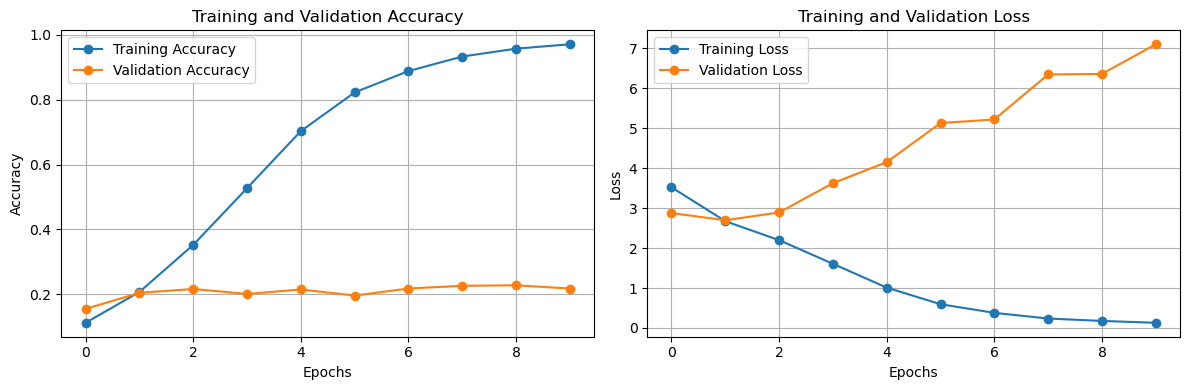

In [20]:
# Extract the training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(epochs_range, acc, label='Training Accuracy', marker='o', linestyle='-')
axs[0].plot(epochs_range, val_acc, label='Validation Accuracy', marker='o', linestyle='-')
axs[0].legend(loc='upper left')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].grid(True)

axs[1].plot(epochs_range, loss, label='Training Loss', marker='o', linestyle='-')
axs[1].plot(epochs_range, val_loss, label='Validation Loss', marker='o', linestyle='-')
axs[1].legend(loc='upper left')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].grid(True)

plt.tight_layout()

plt.show()


We can see that the training loss consistenly decreases while training accuracy increases. This is exactly what we hope to achieve in machine learning! However, we can also see that the story is very different for our validation data. The validation accuracy stays flat while the loss keeps increasing. So what is going on? Well, this is a problem known as overfitting. This indicates that while the model can learn to classify images in the training dataset very well, it is unable to generalize to images it has not seen before. This indicates that we should explore techniques to avoid this, and luckily TensorFlow has many functions that can do this for us!